In [1]:
import pandas as pd
import numpy as np
from VizXpress import gsea, dott_plot
# !pip install mygene
# import mygene
import gseapy
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/coltongarelli/Desktop/bleo paper updates/new bleo data normed counts.csv')
df.groupby('Gene Symbol', as_index=False).mean()
df.set_index('Gene Symbol', inplace=True)
df.index = df.index.str.upper()

In [42]:
d5_gsea = pd.read_csv('/Users/coltongarelli/Desktop/Richmond Lab/ DataFiles/Morphea_SSc_model_comparison/gsea/GSE71998_day5_mice/msigdb_hallmarks.gmt/d5_bleo_gseapy.gsea.gene_set.report.csv',
                     index_col=0)
d21_gsea = pd.read_csv('/Users/coltongarelli/Desktop/Richmond Lab/ DataFiles/Morphea_SSc_model_comparison/gsea/GSE71998_day21_mice/msigdb_hallmarks.gmt/d21 gseapy.gsea.gene_set.report.csv',
                      index_col=0)
dssc = pd.read_csv('/Users/coltongarelli/Desktop/Richmond Lab/ DataFiles/Morphea_SSc_model_comparison/gsea/inflamm_dssc/msigdb_hallmarks/gseapy.gsea.gene_set.report.csv',
                  index_col=0)
lssc = pd.read_csv('/Users/coltongarelli/Desktop/Richmond Lab/ DataFiles/Morphea_SSc_model_comparison/gsea/inflamm_lssc/msigdb_hallmarks/gseapy.gsea.gene_set.report.csv',
                  index_col=0)
utsw_gsea = pd.read_csv('/Users/coltongarelli/Desktop/121020 bleo data/morphea/gseapy.gsea.gene_set.report.csv',
                       index_col=0)

In [9]:
df.pop('MD28S01_C')
df.pop('MD5S02_B')
bleo = df[[*df.columns[df.columns.str.contains('B')].to_list(),
                  *df.columns[df.columns.str.contains('C')].to_list()]]
cols = bleo.columns.str.replace('MD', 'Day')
cols = cols.str.replace('S', ' ')
cols = cols.str.replace('_B', ' Bleo')
cols = cols.str.replace('_C', ' PBS')
bleo.columns = cols
bleo.columns

Index(['Day9 03 Bleo', 'Day5 03 Bleo', 'Day12 06 Bleo', 'Day28 02 Bleo',
       'Day21 06 Bleo', 'Day21 05 Bleo', 'Day16 02 Bleo', 'Day12 01 Bleo',
       'Day9 01 Bleo', 'Day12 08 Bleo', 'Day16 03 Bleo', 'Day9 02 Bleo',
       'Day28 06 Bleo', 'Day12 05 Bleo', 'Day16 04 Bleo', 'Day21 04 Bleo',
       'Day12 09 Bleo', 'Day21 03 PBS', 'Day9 04 PBS', 'Day12 04 PBS',
       'Day12 08 PBS', 'Day12 03 PBS'],
      dtype='object')

In [78]:
d5p = bleo[[*bleo.columns[bleo.columns.str.contains('Day5|PBS')].to_list()]]
d5p = d5p[[*d5p.columns[d5p.columns.str.contains('Bleo')].to_list(),
                  *d5p.columns[d5p.columns.str.contains('PBS')].to_list()]]

d9p = bleo[[*bleo.columns[bleo.columns.str.contains('Day9|PBS')].to_list()]]
d9p = d9p[[*d9p.columns[d9p.columns.str.contains('Bleo')].to_list(),
                  *d9p.columns[d9p.columns.str.contains('PBS')].to_list()]]

d12p = bleo[[*bleo.columns[bleo.columns.str.contains('Day12|PBS')].to_list()]]
d12p = d12p[[*d12p.columns[d12p.columns.str.contains('Bleo')].to_list(),
                  *d12p.columns[d12p.columns.str.contains('PBS')].to_list()]]

d21p = bleo[[*bleo.columns[bleo.columns.str.contains('Day21|PBS')].to_list()]]
d21p = d21p[[*d21p.columns[d21p.columns.str.contains('Bleo')].to_list(),
                  *d21p.columns[d21p.columns.str.contains('PBS')].to_list()]]

d28p = bleo[[*bleo.columns[bleo.columns.str.contains('Day28|PBS')].to_list()]]
d28p = d28p[[*d28p.columns[d28p.columns.str.contains('Bleo')].to_list(),
                  *d28p.columns[d28p.columns.str.contains('PBS')].to_list()]]
d28p
# bleo.columns

,Day28 02 Bleo,Day28 06 Bleo,Day21 03 PBS,Day9 04 PBS,Day12 04 PBS,Day12 08 PBS,Day12 03 PBS
Gene Symbol,,,,,,,
0610005C13RIK,0.000000e+00,1.0000,0.00000,2.00000,0.000000e+00,0.0000,0.00000
0610009B22RIK,1.500000e+01,12.0000,24.00000,16.00000,2.000000e+00,33.0000,18.00000
0610009E02RIK,0.000000e+00,0.0000,3.00000,4.00000,0.000000e+00,2.0000,0.00000
0610009L18RIK,1.000000e+00,2.0000,6.00000,3.00000,2.100000e+01,3.0000,9.00000
0610010F05RIK,7.800000e+01,81.0000,118.00000,117.00000,5.200000e+01,180.0000,83.00000
...,...,...,...,...,...,...,...
N-R5S77,0.000000e+00,2.0000,0.00000,0.00000,8.880000e-16,0.0000,3.00000
N-R5S88,4.114420e+00,12.2127,2.10846,7.36742,4.650070e+00,19.9499,5.00000
N-R5S96,0.000000e+00,0.0000,1.00000,1.00000,2.000000e+00,2.0000,2.00000


In [11]:
d9gp = gseapy.gsea(d9p, '/Users/coltongarelli/pyLibraries/vizxpress/VizXpress/gsea_databases/msigdb_hallmarks.gmt', [*['Bleo']*3, *['Healthy']*5],
                  outdir='/Users/coltongarelli/Desktop/121020 bleo gsea/pooled/d9/')
d12gp = gseapy.gsea(d12p, '/Users/coltongarelli/pyLibraries/vizxpress/VizXpress/gsea_databases/msigdb_hallmarks.gmt', [*['Bleo']*5, *['Healthy']*5],
                  outdir='/Users/coltongarelli/Desktop/121020 bleo gsea/pooled/d12/')
d21gp = gseapy.gsea(d21p, '/Users/coltongarelli/pyLibraries/vizxpress/VizXpress/gsea_databases/msigdb_hallmarks.gmt', [*['Bleo']*3, *['Healthy']*5],
                  outdir='/Users/coltongarelli/Desktop/121020 bleo gsea/pooled/d21/')
d28gp = gseapy.gsea(d28p, '/Users/coltongarelli/pyLibraries/vizxpress/VizXpress/gsea_databases/msigdb_hallmarks.gmt', [*['Bleo']*2, *['Healthy']*5],
                  outdir='/Users/coltongarelli/Desktop/121020 bleo gsea/pooled/d28/')

In [79]:
morphea = pd.read_csv('/Users/coltongarelli/Desktop/Richmond Lab/ DataFiles/Morphea_SSc_model_comparison/utsw morphea microarray normed.csv',index_col=0)
morphea.drop_duplicates()
sc = morphea[[*morphea.columns[morphea.columns.str.contains('sc')].to_list(),
                  *morphea.columns[morphea.columns.str.contains('ua')].to_list()]]
sc


,X311_sc,X215_sc,X302_sc,X299_sc,X225_sc,X271_sc,X267_sc,X266_sc_na,X276_sc,X268_sc,...,X215_ua,X302_ua,X299_ua,X225_ua,X271_ua,X266_ua,X276_ua,X269_ua,X213_ua,X268_ua
IDs,,,,,,,,,,,,,,,,,,,,,
7A5,6.958502,6.831013,6.865576,6.886538,6.972770,6.930590,6.889180,6.968752,6.931663,6.807504,...,6.992114,6.758200,6.943718,6.765955,6.890466,6.939023,6.797751,6.868517,6.853324,6.877562
A1BG,6.966677,6.975658,6.974159,6.889241,6.790692,7.076860,7.029790,6.994153,6.960388,6.988008,...,7.098463,6.995553,7.131726,7.088377,7.150903,7.138155,6.918331,6.955975,7.029124,6.929906
A1BG,6.682546,6.821251,6.654272,6.786259,6.873283,6.787289,6.771524,6.951835,6.798738,6.842297,...,6.699865,6.699179,6.785580,6.733754,6.831427,6.669709,6.707050,6.847454,6.786748,6.974140
A1CF,7.011581,7.119090,6.864707,6.911716,6.880090,7.011885,6.806241,6.969659,6.870439,6.918914,...,7.118538,6.868909,6.999122,6.954251,6.841344,6.862783,6.753930,6.845635,6.828692,6.940887
A1CF,7.107491,7.045825,6.911729,6.978350,6.928379,7.061624,6.844317,6.954063,6.841091,6.883336,...,7.020104,7.033874,6.964362,7.029262,7.016346,6.937668,6.831002,6.976795,6.860407,6.761241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYX,8.322442,8.439537,8.934204,8.372585,8.485192,8.040123,8.533633,8.346354,8.381250,8.550066,...,8.240455,8.420430,8.102570,8.244092,7.938373,7.987534,7.978319,8.240251,8.559035,8.518921
ZYX,9.936889,9.992698,10.393000,9.843534,9.866108,9.619794,10.448240,10.203080,9.974594,10.445390,...,9.641940,9.874115,9.441171,9.645098,9.774687,9.710617,9.384195,9.988531,10.254990,9.984460
ZZEF1,8.824595,8.777451,8.828300,8.844625,8.612618,8.864783,8.942739,9.012498,8.956645,8.764418,...,8.811147,8.878368,9.057007,8.719317,8.887480,8.814420,8.956316,8.789902,8.813528,8.952868


In [80]:
# 12 sc 10 h
sc_gsea = gseapy.gsea(sc, '/Users/coltongarelli/pyLibraries/vizxpress/VizXpress/gsea_databases/msigdb_hallmarks.gmt', [*['Sclerotic Morphea']*12, *['Healthy']*10],
                  outdir='/Users/coltongarelli/Desktop/121020 bleo gsea/human/sc morphea/')

2020-12-14 16:01:40,759 Warning: dropping duplicated gene names, only keep the first values
2020-12-14 16:01:40,774 Warning: Input data contains NA, filled NA with 0


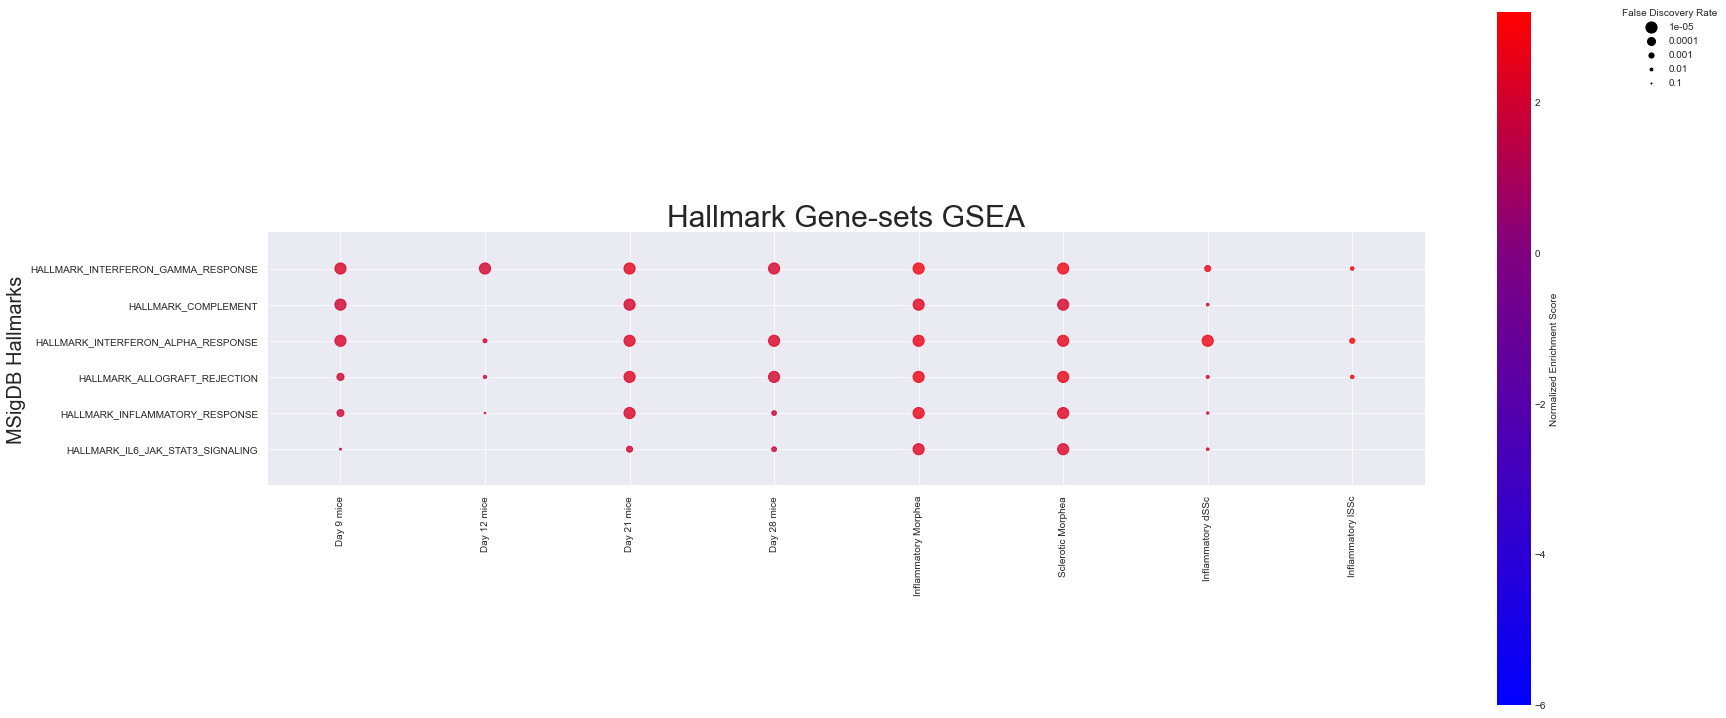

In [83]:
dp_no5 = dott_plot.dot_plot([d9gp.res2d, d12gp.res2d, d21gp.res2d, d28gp.res2d, utsw_gsea, sc_gsea.res2d, dssc, lssc],
                        names=['Day 9 mice', 'Day 12 mice', 'Day 21 mice','Day 28 mice',
                               'Inflammatory Morphea', 'Sclerotic Morphea', 'Inflammatory dSSc', 'Inflammatory lSSc'],
                            title='Hallmark Gene-sets GSEA')

dp_no5[0].savefig('/Users/coltongarelli/Desktop/121020 bleo gsea/human/sc morphea/dotplot d9-28 with inflammatory and sclerotic morphea.png')

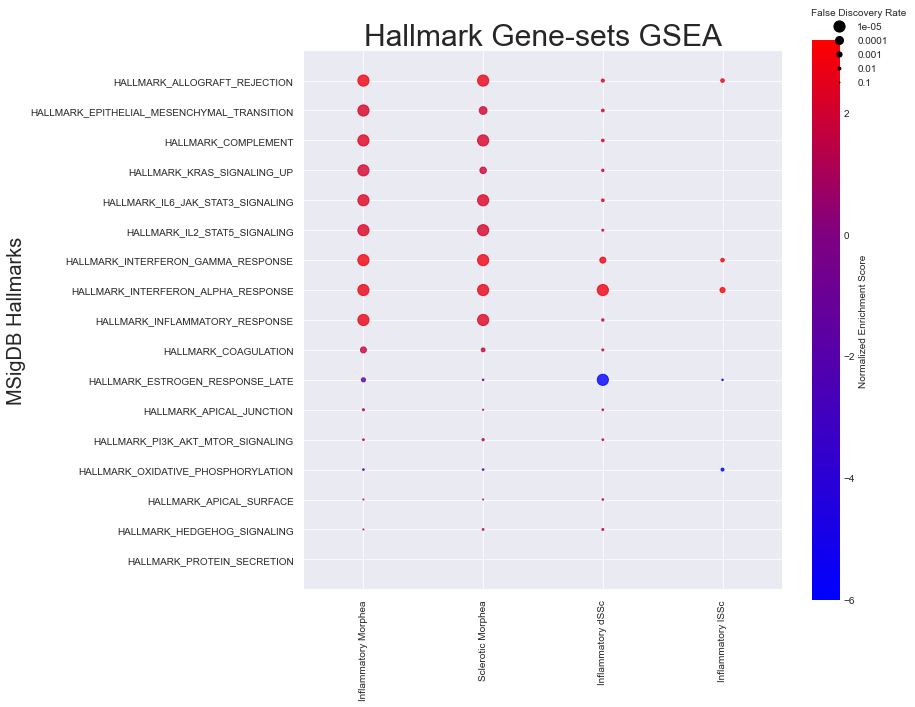

In [84]:
dp_no5 = dott_plot.dot_plot([utsw_gsea, sc_gsea.res2d, dssc, lssc],
                        names=['Inflammatory Morphea', 'Sclerotic Morphea', 'Inflammatory dSSc', 'Inflammatory lSSc'],
                            title='Hallmark Gene-sets GSEA')

dp_no5[0].savefig('/Users/coltongarelli/Desktop/121020 bleo gsea/human/sc morphea/dotplot no mice w sclerotic morphea.png')

In [85]:
d5_gsea = pd.read_csv('/Users/coltongarelli/Desktop/Richmond Lab/ DataFiles/Morphea_SSc_model_comparison/gsea/GSE71998_day5_mice/msigdb_hallmarks.gmt/d5_bleo_gseapy.gsea.gene_set.report.csv',
                     index_col=0)
d21_gsea = pd.read_csv('/Users/coltongarelli/Desktop/Richmond Lab/ DataFiles/Morphea_SSc_model_comparison/gsea/GSE71998_day21_mice/msigdb_hallmarks.gmt/d21 gseapy.gsea.gene_set.report.csv',
                      index_col=0)

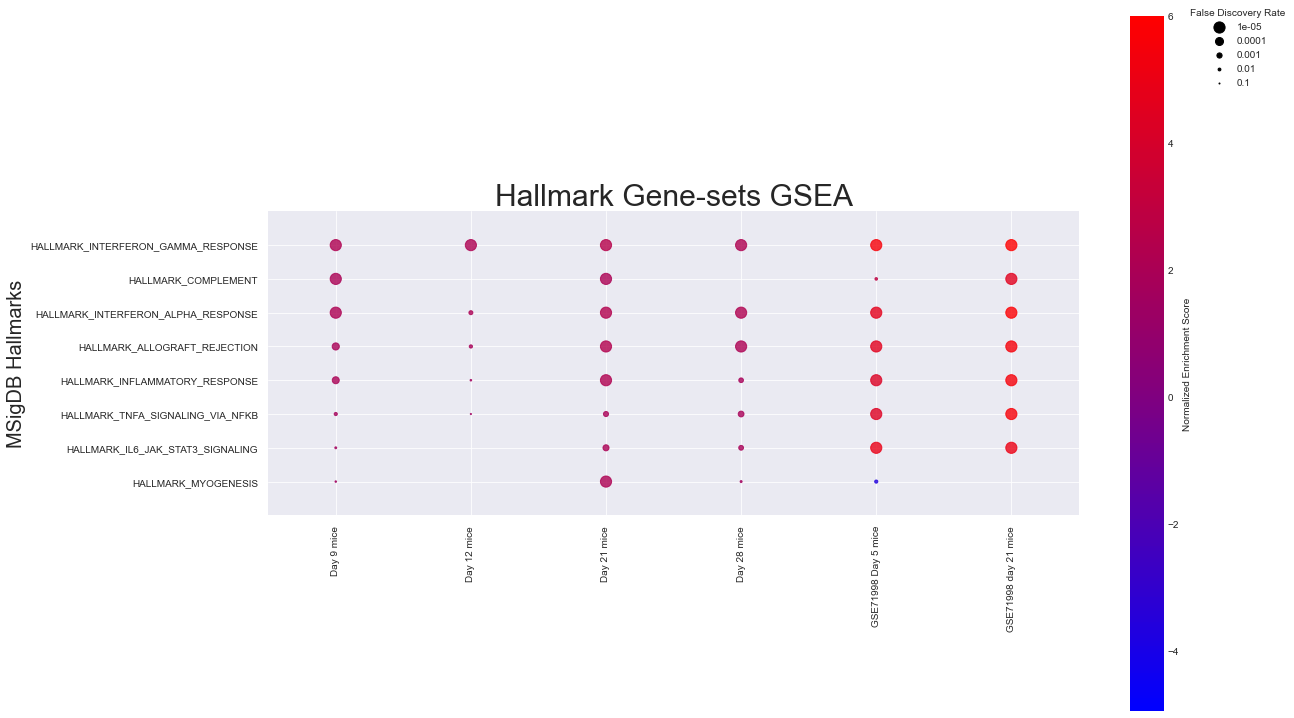

In [87]:
dp_no5 = dott_plot.dot_plot([d9gp.res2d, d12gp.res2d, d21gp.res2d, d28gp.res2d, d5_gsea, d21_gsea],
                        names=['Day 9 mice', 'Day 12 mice', 'Day 21 mice','Day 28 mice', 'GSE71998 Day 5 mice', 'GSE71998 day 21 mice'],
                            title='Hallmark Gene-sets GSEA')
dp_no5[0].savefig('/Users/coltongarelli/Desktop/121020 bleo gsea/human/sc morphea/all mice.png')


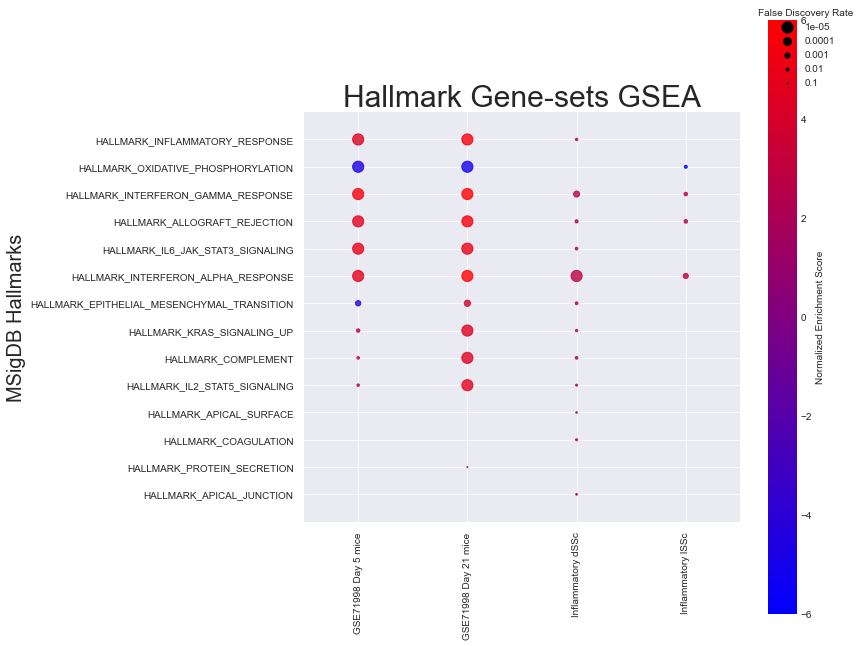

In [93]:
# dp_no5 = dott_plot.dot_plot([d5_gsea, d21_gsea, utsw_gsea, sc_gsea.res2d],
#                         names=['GSE71998 Day 5 mice', 'GSE71998 Day 21 mice','Inflammatory Morphea', 'Sclerotic Morphea'],
#                             title='Hallmark Gene-sets GSEA')

# dp_no5[0].savefig('/Users/coltongarelli/Desktop/121020 bleo gsea/human/sc morphea/GSE71998 mice and utsw morphea.png')
dp_no5 = dott_plot.dot_plot([d5_gsea, d21_gsea, dssc, lssc],
                        names=['GSE71998 Day 5 mice', 'GSE71998 Day 21 mice','Inflammatory dSSc', 'Inflammatory lSSc'],
                            title='Hallmark Gene-sets GSEA')

dp_no5[0].savefig('/Users/coltongarelli/Desktop/121020 bleo gsea/human/sc morphea/GSE71998 mice and gse dssc lssc.png')

In [117]:
from VizXpress import heatmap
import seaborn as sns


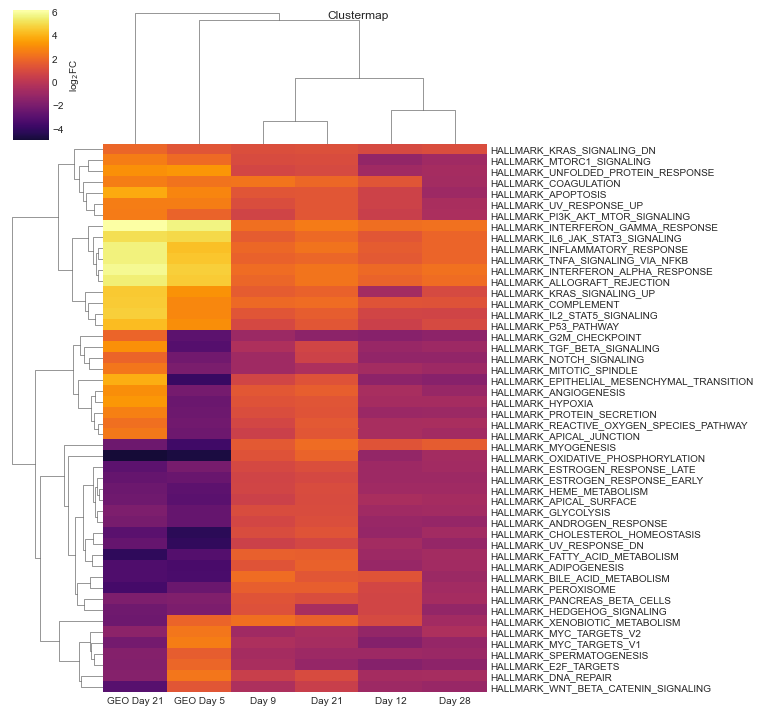

In [146]:
mice_nes = pd.DataFrame(index=['Day 9', 'Day 12', 'Day 21', 'Day 28', 'GEO Day 5', 'GEO Day 21'],data=[d9gp.res2d['nes'], d12gp.res2d['nes'], d21gp.res2d['nes'], d28gp.res2d['nes'], d5_gsea['nes'], d21_gsea['nes']])
mice_nes
heatmap.sns_clustermap(mice_nes.T,)


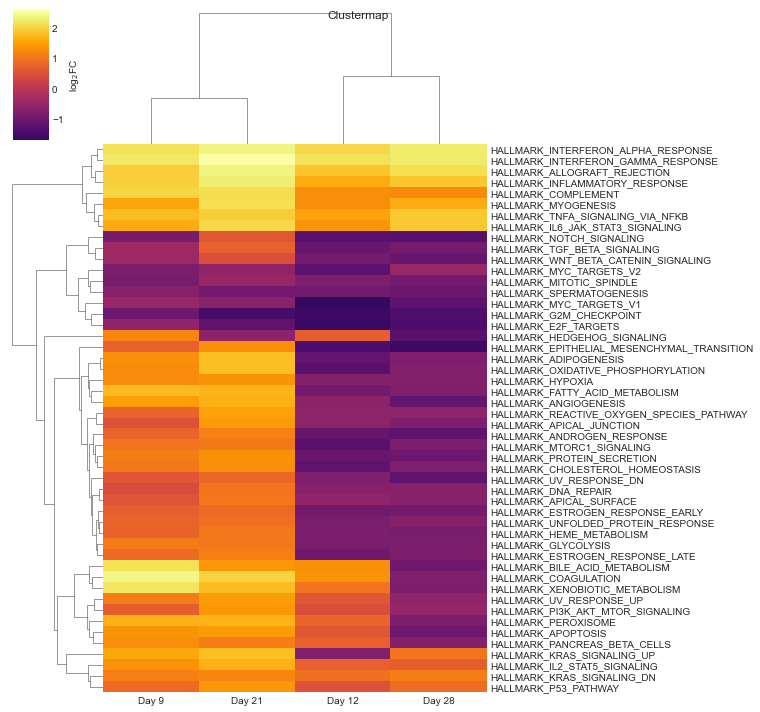

In [147]:
new_mice_nes = pd.DataFrame(index=['Day 9', 'Day 12', 'Day 21', 'Day 28'],data=[d9gp.res2d['nes'], d12gp.res2d['nes'], d21gp.res2d['nes'], d28gp.res2d['nes']])
new_mice_nes
heatmap.sns_clustermap(new_mice_nes.T,)

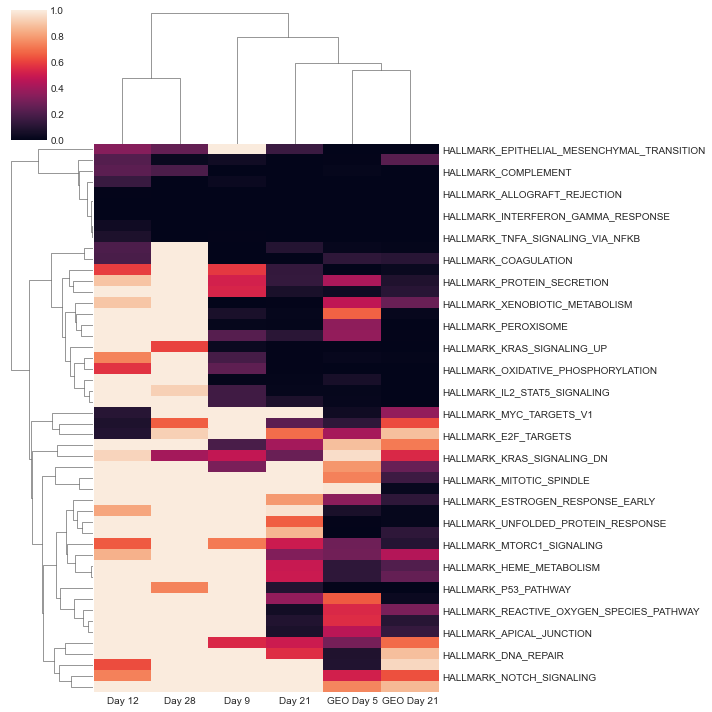

In [118]:
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
mice_fdr = pd.DataFrame(index=['Day 9', 'Day 12', 'Day 21', 'Day 28', 'GEO Day 5', 'GEO Day 21'],data=[d9gp.res2d['fdr'], d12gp.res2d['fdr'], d21gp.res2d['fdr'], d28gp.res2d['fdr'], d5_gsea['fdr'], d21_gsea['fdr']])
mice_fdr.dropna()
# heatmap.sns_clustermap(mice_fdr.dropna().T, z=0)
sns.clustermap(mice_fdr.T)


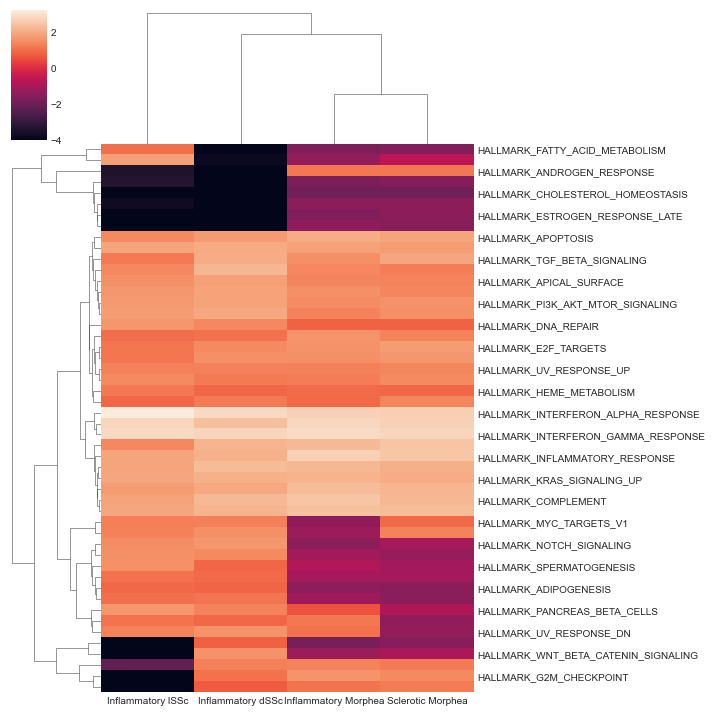

In [142]:
human_nes = pd.DataFrame(index=['Inflammatory Morphea', 'Sclerotic Morphea', 'Inflammatory dSSc', 'Inflammatory lSSc'],
                         data=[utsw_gsea['nes'], sc_gsea.res2d['nes'], dssc['nes'], lssc['nes']])
human_nes2 = human_nes[human_nes >-4]
human_nes2 = human_nes2.replace(np.nan, -4)
sns.clustermap(human_nes2.T)

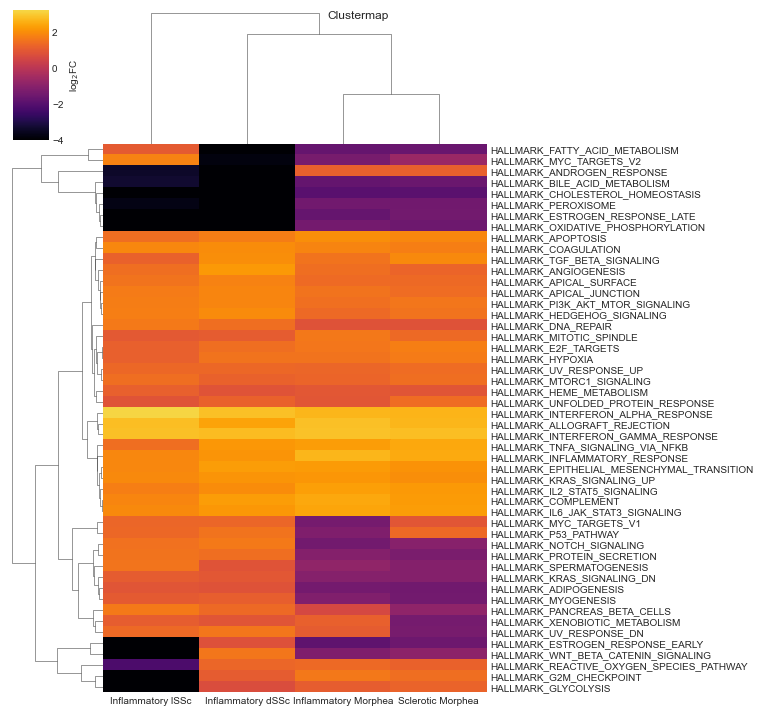

In [148]:
heatmap.sns_clustermap(human_nes2.T)

[Text(0.5, 0, 'Day 12 mice'),
 Text(1.5, 0, 'Inflammatory Morphea'),
 Text(2.5, 0, 'Sclerotic Morphea'),
 Text(3.5, 0, 'Inflammatory dSSc'),
 Text(4.5, 0, 'Inflammatory lSSc')]

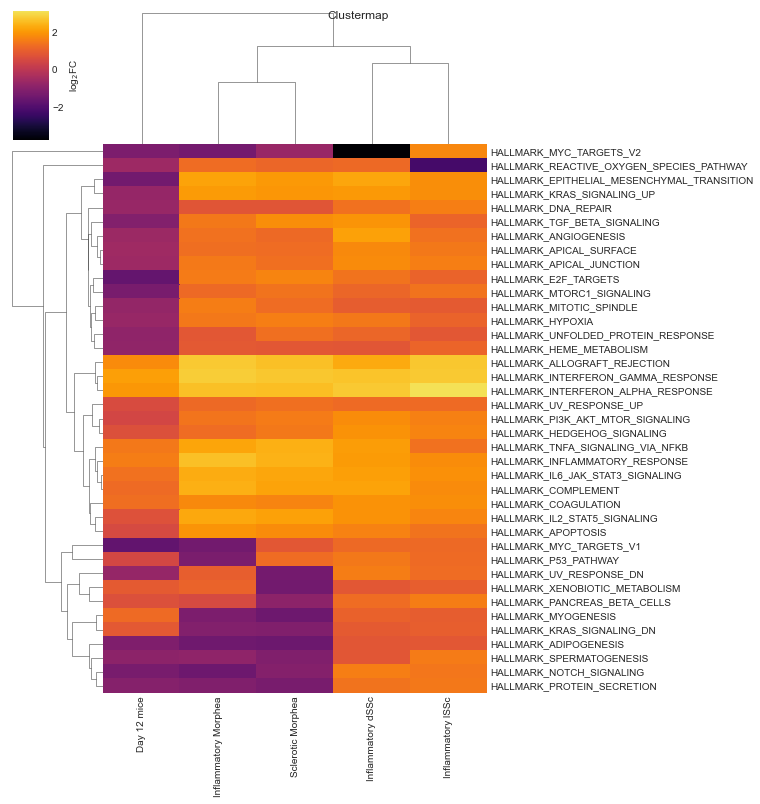

In [157]:
nes = pd.DataFrame(index=['Day 12 mice', 'Inflammatory Morphea', 'Sclerotic Morphea', 'Inflammatory dSSc', 'Inflammatory lSSc'],
                         data=[d12gp.res2d['nes'],utsw_gsea['nes'], sc_gsea.res2d['nes'], dssc['nes'], lssc['nes']])
nes2 = nes[nes >-4]
h = heatmap.sns_clustermap(nes2.T)
h.ax_heatmap.set_xticklabels(labels=nes.index,rotation=90)

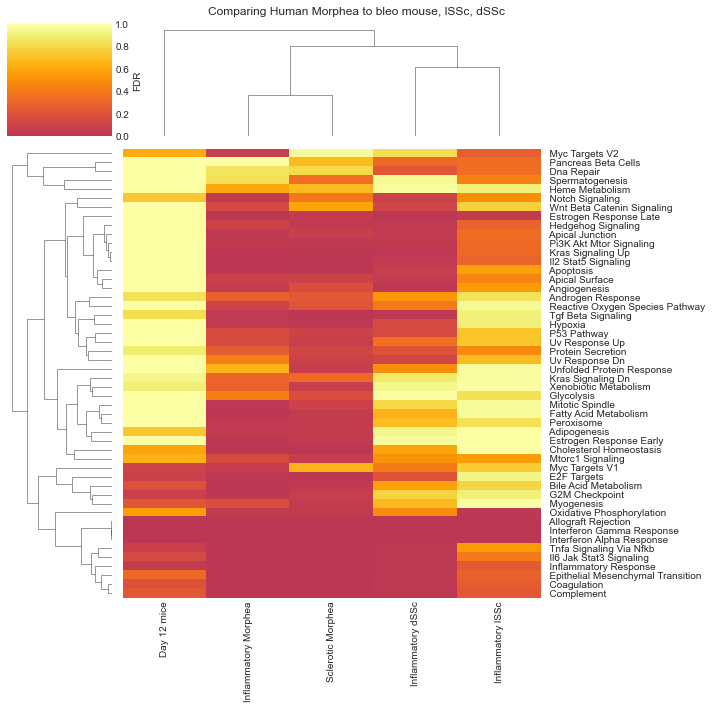

In [172]:
fdr = pd.DataFrame(index=['Day 12 mice', 'Inflammatory Morphea', 'Sclerotic Morphea', 'Inflammatory dSSc', 'Inflammatory lSSc'],
                         data=[d12gp.res2d['fdr'],utsw_gsea['fdr'], sc_gsea.res2d['fdr'], dssc['fdr'], lssc['fdr']])
fdr.columns = fdr.columns.str.replace('HALLMARK', ' ')
fdr.columns = fdr.columns.str.replace('_', ' ')
fdr.columns = fdr.columns.str.title()
fdr2 = fdr[fdr >-4]
h = heatmap.sns_clustermap(fdr.T, title='Comparing Human Morphea to bleo mouse, lSSc, dSSc', bar_label='FDR')
h.ax_heatmap.set_xticklabels(labels=fdr.index,rotation=90)
h.ax_heatmap.figure.savefig('/Users/coltongarelli/Desktop/121020 bleo gsea/fdr heatmap of d12 morphea SSc.png')
plt.tight_layout()